# Library

In [1]:
from Module.Global_variable import os, time, torch, np, pd, plt
from Module.utils.Convenience_Function import save_pickle, time_checker
import Module.process1.preparatory_items as p1pi
from Module.process1.index_dictionary_maker import get_index_dictionary
from Module.process1.pipeLine import model_pipeline

# Global Variable

In [2]:
# Process 시작 전 정의 사항
#####################################################################################
_MAKE_NEW_DIRECTORY = False    # directory 생성
_MAKE_NEW_INDEX_DICT = False   # Index dictionary를 새로 생성할 것인지
# Log를 출력할 것인지
_VERBOSE = True
# Train 중 log를 저장할 것인지
_SAVE_TRAIN_LOG = True
# Time iteration log를 저장할 것인지
_SAVE_ITER_LOG = True
# 사용할 GPU 번호
_GPU_NUMBER = 0
torch.cuda.set_device(_GPU_NUMBER)   # set basic gpu
# torch._dynamo 캐시 한계치 조정
torch._dynamo.config.cache_size_limit = 64   # Default
# 모델 저장 여부
_MODEL_SAVE_BOOL = True
#####################################################################################


# 학습 간 전역 변수 설정
#####################################################################################
# process 기초 디렉터리 생성
p1pi.make_process_start_dir(makes_new=_MAKE_NEW_DIRECTORY)
# index dictionary with Data Loader
_IDX_DICT = get_index_dictionary(process_boolean=_MAKE_NEW_INDEX_DICT).process()
#####################################################################################


# Model 학습 관련 변수 설정
#####################################################################################
_PROCESS_SET_DICT = p1pi.get_process_set_dict(
    model_save=_MODEL_SAVE_BOOL,        # 모델 저장 여부
    save_iter_time_log=_SAVE_ITER_LOG,  # iteration의 time log 저장 여부
    save_train_log=_SAVE_TRAIN_LOG,     # 학습 과정에사 발생하는 주요 issue의 저장 여부
    verbose=_VERBOSE
)
_MODEL_SET_DICT = p1pi.get_model_set_dict(
    model_key="retinaNet",
    cnn_key="resnet50_v2",
    optimizer_key="AdamW"
)
_HYPER_PARAMS_DICT = p1pi.get_HP_set_dict(
    learing_rate=0.0001, weight_decay=0.005,
    T_0=20, T_mult=2, eta_min=0.00000001,
    CS_threshold=0.5,   # 모델의 추론 결과에 대하여 Confidence socre의 threshold
    iou_threshold=0.3   # NMS에 적용될 IoU의 threshold
)
# _HYPER_PARAMS_DICT = p1pi.get_HP_set_dict(
#     learing_rate=0.0001, weight_decay=0.005,
#     T_0=20, T_mult=2, eta_min=0.00000001,
#     CS_threshold=0.5,   # 모델의 추론 결과에 대하여 Confidence socre의 threshold
#     iou_threshold=0.3   # NMS에 적용될 IoU의 threshold
# )
#####################################################################################

# Function

# Process

In [3]:
for k in range(_PROCESS_SET_DICT["k_size"]):
    
    # Model 학습을 위한 Instance 생성
    MTnE_Ob = model_pipeline(
        p_set_dict=_PROCESS_SET_DICT, m_set_dict=_MODEL_SET_DICT, hp_dict=_HYPER_PARAMS_DICT,
        idx_dict=_IDX_DICT, gpu_num=_GPU_NUMBER
    )
    # DataLoader와 predict에 사용될 idx_dict(pred_idx_dict)를 정의한다.
    MTnE_Ob.define_k_Loader_and_idx_dict(k)
    # Model 정의
    MTnE_Ob.import_model()
    # Optimizer(Scheduler, Scaler) 정의
    MTnE_Ob.import_optimizer_and_scheduler()
    # 주요 Instance 생성
    MTnE_Ob.make_important_Instance(k)
    
    MTnE_Ob.Iter_log_Ins.make_log_file()      # 해당 Dataset에 대한 신규 Log file 생성
    MTnE_Ob.make_train_log_path_and_file(k)   # 해당 train에 대한 train_log의 경로 및 파일 생성
    MTnE_Ob.make_model_save_path(k)           # model 저장 경로 생성
    
    # 모델의 학습 및 추론 실시.
    loss_dict, score_dict, predict_dict = MTnE_Ob.model_train_and_evaluate()
    
    break

Epochs:  1/200 [train][=============================================================] (1114/1114) [time] 0:13:42.42 total loss: 0.1919 [Loss ]  | classification 0.1176 | bbox_regression 0.0743
Epochs:  1/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:51.24 total loss: 0.0667 [Score]  | AP(AP@[.50:.05:.95]) 0.6833 | AP50 0.9051 | AP75 0.8345 | precision 0.9938 | recall 0.9078 | f1_score 0.9489
save check point: [before]: inf / [now]: 0.066722 - Saving model...
Epochs:  2/200 [train][=============================================================] (1114/1114) [time] 0:14:24.32 total loss: 0.0969 [Loss ]  | classification 0.0346 | bbox_regression 0.0623
Epochs:  2/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:54.31 total loss: 0.0580 [Score]  | AP(AP@[.50:.05:.95]) 0.7035 | AP50 0.9025 | AP75 0.8521 | precision 0.9962 | recall 0.9044 | f1_score 0.9481
save check point: [before]: 0.066722

Epochs: 18/200 [train][=============================================================] (1114/1114) [time] 0:11:01.76 total loss: 0.0577 [Loss ]  | classification 0.0148 | bbox_regression 0.0430
Epochs: 18/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:32.01 total loss: 0.0417 [Score]  | AP(AP@[.50:.05:.95]) 0.7774 | AP50 0.9570 | AP75 0.9174 | precision 0.9994 | recall 0.9579 | f1_score 0.9782
Epochs: 19/200 [train][=============================================================] (1114/1114) [time] 0:11:26.40 total loss: 0.0692 [Loss ]  | classification 0.0205 | bbox_regression 0.0487
Epochs: 19/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:34.50 total loss: 0.0886 [Score]  | AP(AP@[.50:.05:.95]) 0.7028 | AP50 0.8870 | AP75 0.8506 | precision 0.9924 | recall 0.8884 | f1_score 0.9375
Epochs: 20/200 [train][=============================================================] (1114/1114) [time]

Epochs: 36/200 [train][=============================================================] (1114/1114) [time] 0:11:28.95 total loss: 0.0505 [Loss ]  | classification 0.0119 | bbox_regression 0.0386
Epochs: 36/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:33.05 total loss: 0.0392 [Score]  | AP(AP@[.50:.05:.95]) 0.7761 | AP50 0.9481 | AP75 0.9185 | precision 0.9988 | recall 0.9493 | f1_score 0.9734
Epochs: 37/200 [train][=============================================================] (1114/1114) [time] 0:11:02.11 total loss: 0.0560 [Loss ]  | classification 0.0138 | bbox_regression 0.0421
Epochs: 37/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:30.97 total loss: 0.0512 [Score]  | AP(AP@[.50:.05:.95]) 0.6997 | AP50 0.8766 | AP75 0.8491 | precision 0.9994 | recall 0.8776 | f1_score 0.9345
Epochs: 38/200 [train][=============================================================] (1114/1114) [time]

Epochs: 54/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:33.93 total loss: 0.0419 [Score]  | AP(AP@[.50:.05:.95]) 0.7618 | AP50 0.9359 | AP75 0.9082 | precision 0.9982 | recall 0.9374 | f1_score 0.9668
Epochs: 55/200 [train][=============================================================] (1114/1114) [time] 0:11:34.56 total loss: 0.0543 [Loss ]  | classification 0.0128 | bbox_regression 0.0414
Epochs: 55/200 [valid][=============================================================] ( 125/ 125) [time] 0:01:31.10 total loss: 0.0413 [Score]  | AP(AP@[.50:.05:.95]) 0.7779 | AP50 0.9590 | AP75 0.9281 | precision 0.9982 | recall 0.9601 | f1_score 0.9788
Epochs: 56/200 [train][=============================================================] (1114/1114) [time] 0:10:44.20 total loss: 0.0538 [Loss ]  | classification 0.0125 | bbox_regression 0.0413
Epochs: 56/200 [valid][=============================================================] ( 125/ 125) [time]

# Result

In [4]:
score_dict['test']

{'AP(AP@[.50:.05:.95])': 0.7760329494150386,
 'AP50': 0.9443438623559908,
 'AP75': 0.9196618545578324,
 'precision': 0.9990298326461314,
 'recall': 0.9447247706422018,
 'f1_score': 0.9711187080042438}

In [5]:
from Module.process1.model_predict_checker import model_predict_checker

In [6]:
Check0_Ins = model_predict_checker(predict_dict=predict_dict, k=0, idx_dict=_IDX_DICT)
over_pred_df, under_pred_df, diff_pred_df, good_id_df = Check0_Ins.make_basic_value()

1. 추론에 사용된 전체 이미지의 갯수: 2472
--------------------------------------------------------------------------------
1-1. GT를 가지고 있는 이미지의 갯수: 820(0.332)
1-2. GT를 가지고 있지 않은 이미지의 갯수: 1652(0.668)


2. 모델의 추론 능력
--------------------------------------------------------------------------------
2-1. 모델이 GT를 찾지 못한 경우: 0
2-2. 모델이 GT가 없는 대상을 과하게 찾은 경우: 0
2-3. 총 GT의 크기 = 4359
2-3. 모델이 찾지 못한 GT의 크기 = 236(0.054)
2-4. 모델이 과도하게 찾은 GT의 크기 = 0


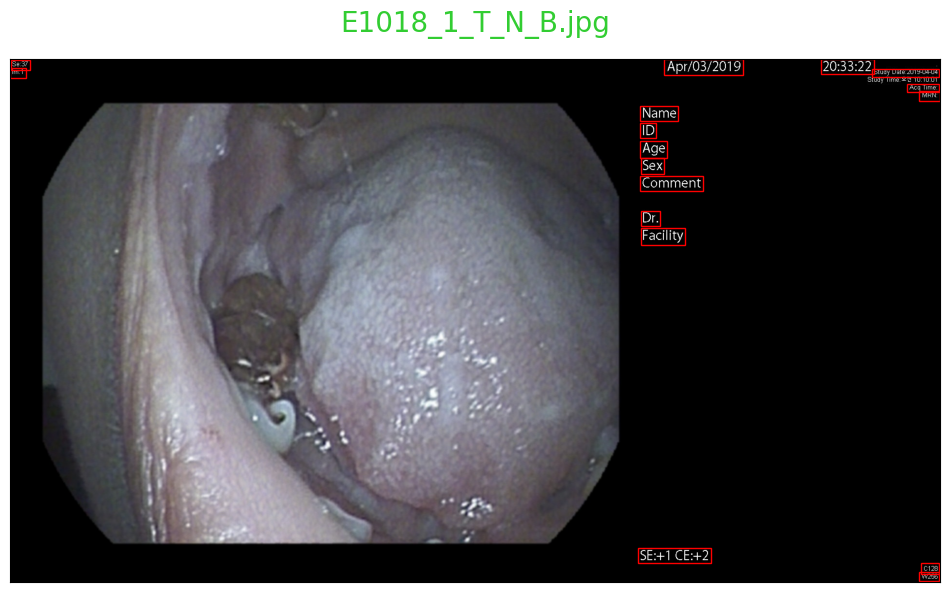

In [7]:
Check0_Ins.draw_predict_image(img_id=12241)